In [1]:
from cashe import get_train_test_split, get_training_inputs, drop_nomodel_columns
from src.model_app import ModelApplication, ModelApplicationDeployment
from src.utilities_rejection import RejectionReasonLabeling
from src.data_local import MergedDataPreprocessing
from src.model_train import ModelTrainer
import pandas as pd
import numpy as np

df_train, df_test = get_train_test_split('data/HJH/12-06-2024')

In [2]:
df_train['ICD10']

index
398359      J93
398360      K02
398361    N80.1
398365    N80.1
398364    N80.1
          ...  
301411    R07.4
301412    R07.4
301413    R07.4
316581      K21
322045    R07.4
Name: ICD10, Length: 165684, dtype: object

In [3]:
X_train, y_train, X_test, y_test = get_training_inputs(df_train, df_test)
X_train = drop_nomodel_columns(X_train);  X_test = drop_nomodel_columns(X_test)

In [4]:
X_test['ICD10']

index
322046    R07.4
322044    R07.4
322048    R07.4
322047    R07.4
304945    J18.0
          ...  
164576      Z38
164575      Z38
164540      Z38
164573      Z38
164579      Z38
Name: ICD10, Length: 41422, dtype: object

In [6]:
X_test[['SERVICE_DESCRIPTION', 'SERVICE_TYPE', 'OASIS_IOS_DESCRIPTION', 'PROVIDER_DEPARTMENT']]

,SERVICE_DESCRIPTION,SERVICE_TYPE,OASIS_IOS_DESCRIPTION,PROVIDER_DEPARTMENT
index,,,,
322046,Quantitative Troponin (Protein) Analysis,laboratory,Quantitative Troponin (Protein) Analysis,EMERGENCY ROOM SERVICES - طوارى
322044,CRP,laboratory,CRP,EMERGENCY ROOM SERVICES - طوارى
322048,Emergency Consultation,services,EMERGENCY CONSULTATION,EMERGENCY ROOM SERVICES - طوارى
322047,"Radiography of chest, 1 view",imaging,"Radiography of chest, 1 view",EMERGENCY ROOM SERVICES - طوارى
304945,Automated complete Blood cell and differentia...,laboratory,Automated complete Blood cell and differentia...,PAEDIATRIC SERVICES - الاطفال
...,...,...,...,...
164576,Ultrasound of abdomen,imaging,ULTRASONOGRAPHY OF THE ABDOMEN,PAEDIATRIC SERVICES - الاطفال
164575,Ultrasound of head,imaging,U.S BRAIN FOR NEWBORN,PAEDIATRIC SERVICES - الاطفال
164540,ABG,laboratory,BLOOD GASES,PAEDIATRIC SERVICES - الاطفال


In [9]:
X_test[['DOCTOR_SPECIALTY_CODE','PROVIDER_DEPARTMENT_CODE']]

,DOCTOR_SPECIALTY_CODE,PROVIDER_DEPARTMENT_CODE
index,,
322046,4.0,39
322044,4.0,39
322048,4.0,39
322047,4.0,39
304945,14.0,22
...,...,...
164576,14.0,22
164575,14.0,22
164540,14.0,22


In [11]:
X_test[['DOCTOR_SPECIALTY','PROVIDER_DEPARTMENT']]

KeyError: "['DOCTOR_SPECIALTY'] not in index"

In [5]:
y_test.columns

Index(['OUTCOME', 'SUBMIT_CLAIM_MESSAGE'], dtype='object')

In [6]:
X_test

,NET_WITH_VAT,SERVICE_DESCRIPTION,QTY,LINE_CLAIMED_AMOUNT_SAR,LINE_ITEM_DISCOUNT,NET_VAT_AMOUNT,PATIENT_VAT_AMOUNT,VAT_PERCENTAGE,TREATMENT_TYPE_INDICATOR,SERVICE_TYPE,...,TOTAL_CLAIMED_AMOUNT_SAR,TOTAL_DISCOUNT,TOTAL_DEDUCTIBLE,TOTAL_PATIENT_VATAMOUNT,DEPARTMENT_TYPE,TREATMENT_TYPE,PURCHASER_CODE,NEW_BORN,ICD10,PatientAgeRange
397469,172.50,Consultant Consultation,1.0,150.00,0.00,22.50,0.0,0.15,2,services,...,169.95,1.00,0.00,0.0,20.0,1,1494,0,8,8
397468,18.95,OPTIDEX-T STERILE OPHTALMIC SUSP,1.0,19.95,1.00,0.00,0.0,0.00,2,medication-codes,...,169.95,1.00,0.00,0.0,20.0,1,1494,0,8,8
397470,172.50,Specialist Consultation,1.0,150.00,0.00,22.50,0.0,0.15,2,services,...,150.00,0.00,0.00,0.0,18.0,1,1494,0,15,6
396800,24.27,ELICASAL OINT 30 GM,1.0,25.55,1.28,0.00,0.0,0.00,2,medication-codes,...,175.55,1.28,0.00,0.0,5.0,1,1494,0,13,7
396799,172.50,Specialist Consultation,1.0,150.00,0.00,22.50,0.0,0.15,2,services,...,175.55,1.28,0.00,0.0,5.0,1,1494,0,13,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159314,78.66,Bilirubin Total,1.0,99.00,29.70,9.36,0.0,0.15,2,laboratory,...,140.70,32.62,10.81,0.0,22.0,1,182,1,22,1
178827,1004.46,Endoscopic removal of ureteric stent,1.0,1746.88,873.44,131.02,0.0,0.15,2,procedures,...,22171.89,7417.51,0.00,0.0,NaN,0,2134,0,15,5
178825,1545.31,Cystoscopy,1.0,2687.50,1343.75,201.56,0.0,0.15,2,procedures,...,22171.89,7417.51,0.00,0.0,NaN,0,2134,0,15,5
178824,10245.42,Endosc extr ureteric calc via ureterosc,1.0,10481.25,1572.19,1336.36,0.0,0.15,2,procedures,...,22171.89,7417.51,0.00,0.0,NaN,0,2134,0,15,5


In [7]:
preprocessing_train = MergedDataPreprocessing(X_train)
X_train_prep = preprocessing_train.columns_prep(service_encoding=False)

preprocessing_test = MergedDataPreprocessing(X_test)
X_test_prep = preprocessing_test.columns_prep(service_encoding=False)

X_train_encoded = preprocessing_train.column_embedding(X_train_prep)
X_test_encoded = preprocessing_train.column_embedding(X_test_prep)

X_train_encoded.fillna(0,inplace=True)
X_test_encoded.fillna(0,inplace=True)


C:\AI_Projects\Claims_Rejection_2024\Claims_Rejection\src\data_local.py:269: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.df['PatientAgeRange'] = self.df.PatientAgeRange.replace(age_encoding)
C:\AI_Projects\Claims_Rejection_2024\Claims_Rejection\src\data_local.py:269: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.df['PatientAgeRange'] = self.df.PatientAgeRange.replace(age_encoding)


In [8]:
X_test_encoded['ICD10']

397469     8
397468     8
397470    15
396800    13
396799    13
          ..
159314    22
178827    15
178825    15
178824    15
178826    15
Name: ICD10, Length: 41064, dtype: int64

In [9]:
model_runner = ModelApplication(X_train=X_train_encoded,y_train=y_train['OUTCOME'],
                            X_test=X_test_encoded,y_test=y_test['OUTCOME'])



In [10]:
model_runner.get_model(force_retrain=True,model_type='outcome')

Training is done


In [11]:
## runtime 1
model_runner.evaluate_model()

{'XGBoost': {'Accuracy': 0.77,
  'Precision': 0.76,
  'Recall': 0.8,
  'F1 Score': 0.78}}

In [12]:
features_df = features_imp = list(model_runner.get_feature_importance())
pd.DataFrame({"Column name":list(X_train.columns),"Importance":features_imp}).sort_values(ascending=False,by=['Importance'])

,Column name,Importance
27,DEPARTMENT_TYPE,0.100227
29,PURCHASER_CODE,0.075317
8,DURATION,0.066917
22,CLAIM_TYPE,0.048391
28,TREATMENT_TYPE,0.044782
2,LINE_CLAIMED_AMOUNT_SAR,0.027881
12,DISCOUNT_PERCENTAGE,0.027740
6,VAT_PERCENTAGE,0.025833
4,NET_VAT_AMOUNT,0.025792
3,LINE_ITEM_DISCOUNT,0.025551


In [13]:
model_runner.xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [66]:
top_features_df = pd.DataFrame({"Column_name":X_test_encoded.columns,"Feature_importance":model_runner.get_feature_importance()}).sort_values(
    by=['Feature_importance'],ascending=False,)[:10]
top_features_df

,Column_name,Feature_importance
27,DEPARTMENT_TYPE,0.100227
29,PURCHASER_CODE,0.075317
8,DURATION,0.066917
22,CLAIM_TYPE,0.048391
28,TREATMENT_TYPE,0.044782
2,LINE_CLAIMED_AMOUNT_SAR,0.027881
12,DISCOUNT_PERCENTAGE,0.027740
6,VAT_PERCENTAGE,0.025833
4,NET_VAT_AMOUNT,0.025792
3,LINE_ITEM_DISCOUNT,0.025551


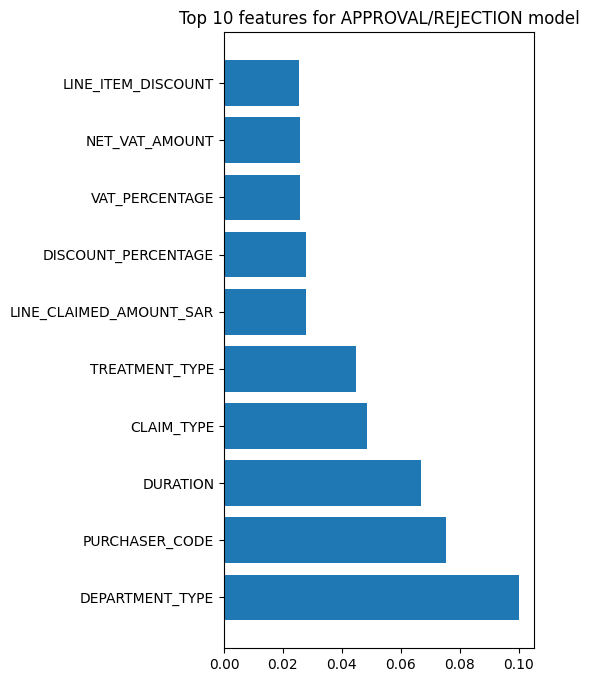

In [69]:
import  matplotlib.pyplot as plt
plt.figure(figsize=(4,8))
plt.barh(top_features_df['Column_name'],top_features_df['Feature_importance'])
plt.title('Top 10 features for APPROVAL/REJECTION model',)

# Get the current figure and axes
fig = plt.gcf()
ax = plt.gca()

# Set background color
fig.patch.set_facecolor('white')  # Set figure background color
ax.set_facecolor('white')         # Set axes background color

# Show the plot
plt.show()

In [14]:
X_test_encoded

,NET_WITH_VAT,QTY,LINE_CLAIMED_AMOUNT_SAR,LINE_ITEM_DISCOUNT,NET_VAT_AMOUNT,PATIENT_VAT_AMOUNT,VAT_PERCENTAGE,TREATMENT_TYPE_INDICATOR,DURATION,QTY_STOCKED_UOM,...,CombinedText7,CombinedText8,CombinedText9,CombinedText10,CombinedText11,CombinedText12,CombinedText13,CombinedText14,CombinedText15,CombinedText16
397469,172.50,1.0,150.00,0.00,22.50,0.0,0.15,2,0.0,1,...,0,0,0,0,0,0,0,0,0,0
397468,18.95,1.0,19.95,1.00,0.00,0.0,0.00,2,7.0,1,...,0,0,0,0,0,0,0,0,0,0
397470,172.50,1.0,150.00,0.00,22.50,0.0,0.15,2,0.0,1,...,0,0,0,0,0,0,0,0,0,0
396800,24.27,1.0,25.55,1.28,0.00,0.0,0.00,2,15.0,1,...,0,0,0,0,0,0,0,0,0,0
396799,172.50,1.0,150.00,0.00,22.50,0.0,0.15,2,0.0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159314,78.66,1.0,99.00,29.70,9.36,0.0,0.15,2,0.0,1,...,0,0,0,0,0,0,0,0,0,0
178827,1004.46,1.0,1746.88,873.44,131.02,0.0,0.15,2,0.0,1,...,0,0,0,0,0,0,0,0,0,0
178825,1545.31,1.0,2687.50,1343.75,201.56,0.0,0.15,2,0.0,1,...,0,0,0,0,0,0,0,0,0,0
178824,10245.42,1.0,10481.25,1572.19,1336.36,0.0,0.15,2,0.0,1,...,0,0,0,0,0,0,0,0,0,0


# Shaply Plot

In [26]:
# selecting accepted claims only 

X_test_encoded.iloc[(y_test==1).index.tolist()]

IndexError: positional indexers are out-of-bounds

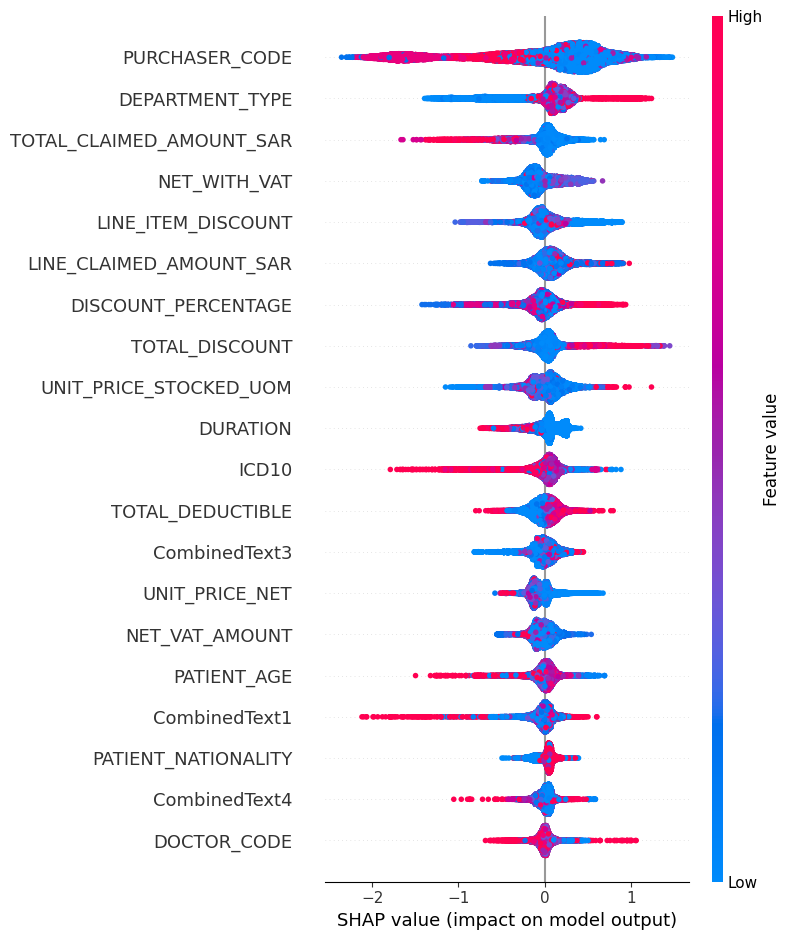

In [20]:
import shap
explainer = shap.TreeExplainer(model_runner.xgb_model)

shap_values = explainer.shap_values(X_test_encoded)
shap.summary_plot(shap_values,X_test_encoded,feature_names=X_test_encoded.columns)


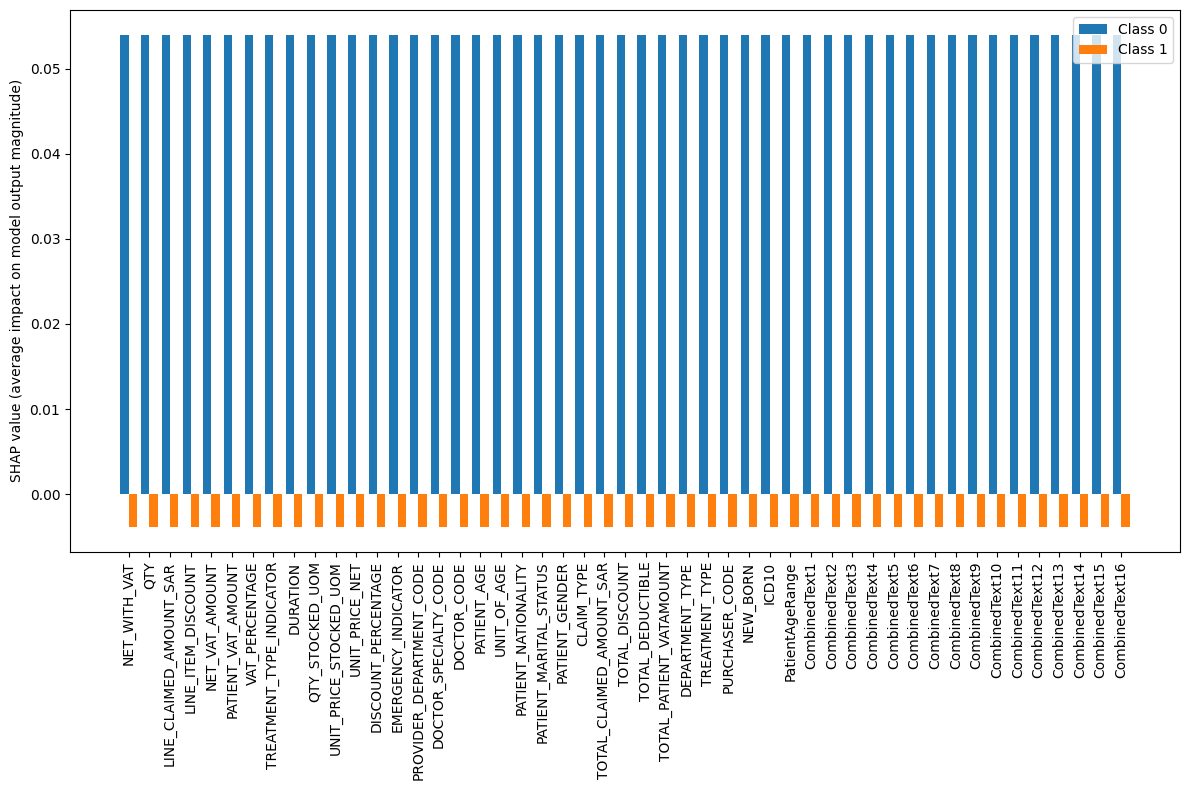

In [19]:
from matplotlib import pyplot as plt

shap_values_class0 = shap_values[0]
shap_values_class1 = shap_values[1]

fig, ax = plt.subplots(figsize=(12, 8))
width = 0.4
ax.bar(np.arange(len(X_test_encoded.columns)) - width/2, shap_values_class0.mean(axis=0), width=width, label='Class 0')
ax.bar(np.arange(len(X_test_encoded.columns)) + width/2, shap_values_class1.mean(axis=0), width=width, label='Class 1')
ax.set_xticks(np.arange(len(X_test_encoded.columns)))
ax.set_xticklabels(X_test_encoded.columns, rotation=90)
ax.set_ylabel('SHAP value (average impact on model output magnitude)')
ax.legend()
plt.tight_layout()
plt.show()